In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE/CSE424/Final Project/Codes/TrafficTwoMonth.csv')
df.head(100)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
95,11:45:00 PM,10,Tuesday,8,1,2,31,42,normal
96,12:00:00 AM,11,Wednesday,9,1,2,29,41,normal
97,12:15:00 AM,11,Wednesday,12,2,1,32,47,normal
98,12:30:00 AM,11,Wednesday,11,2,1,33,47,normal


In [ ]:
df[df['Traffic Situation'] != 'normal']

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
16,4:00:00 AM,10,Tuesday,82,7,3,10,102,low
18,4:30:00 AM,10,Tuesday,89,10,2,10,111,low
19,4:45:00 AM,10,Tuesday,77,3,0,18,98,low
31,7:45:00 AM,10,Tuesday,143,30,17,12,202,heavy
32,8:00:00 AM,10,Tuesday,134,18,21,11,184,heavy
...,...,...,...,...,...,...,...,...,...
5932,7:00:00 PM,9,Thursday,109,23,14,26,172,heavy
5938,8:30:00 PM,9,Thursday,67,19,11,8,105,low
5939,8:45:00 PM,9,Thursday,61,14,10,5,90,low
5941,9:15:00 PM,9,Thursday,91,5,12,34,142,high


In [ ]:
df.shape

(5952, 9)

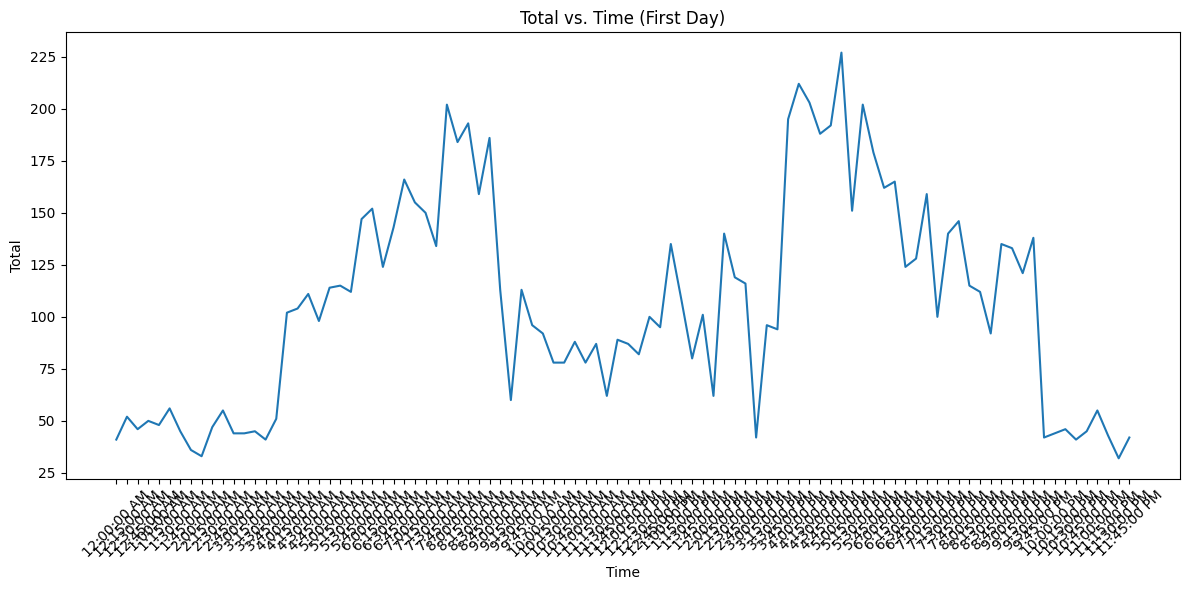

In [ ]:
import matplotlib.pyplot as plt

# in our dataset first 96 entries means 1 day(15*96 = 1440mins = 1 day)
df_first_day = df.iloc[:96]

plt.figure(figsize=(12, 6))
plt.plot(df_first_day['Time'], df_first_day['Total'])
plt.xlabel('Time')
plt.ylabel('Total')
plt.title('Total vs. Time (First Day)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

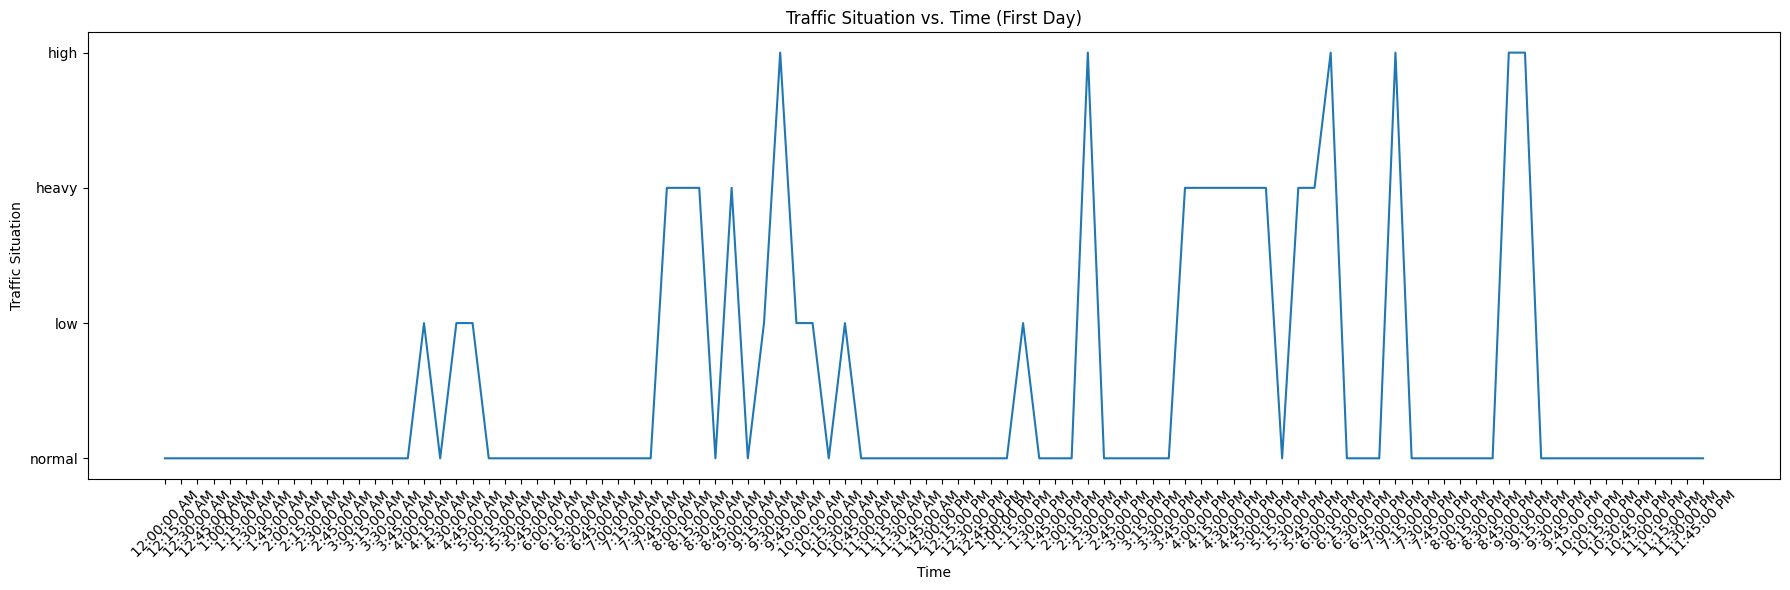

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plt.plot(df_first_day['Time'], df_first_day['Traffic Situation'])
plt.xlabel('Time')
plt.ylabel('Traffic Situation')
plt.title('Traffic Situation vs. Time (First Day)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Changed the date to year-month-date format

df_first_day = df.iloc[:96]# 1 day

#after 1 day which is 96 rows in the dataset day increases by one
import datetime

df['Date'] = pd.to_datetime('2023-12-10')

for i in range(0, len(df), 96):
  if i + 96 <= len(df):
    df.loc[i:i+95, 'Date'] = df.loc[i, 'Date']
    next_date = df.loc[i, 'Date'] + datetime.timedelta(days=1)
    if i+96 < len(df):
      df.loc[i+96, 'Date'] = next_date

df.head(5992)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,2023-12-10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,2023-12-10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,2023-12-10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,2023-12-10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,2023-12-10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,2024-02-09,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,2024-02-09,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,2024-02-09,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,2024-02-09,Thursday,16,5,0,27,48,normal


In [ ]:
#switched places of date and time
cols = list(df.columns)

date_index = cols.index('Date')
time_index = cols.index('Time')

cols.pop(date_index)
cols.pop(time_index)

cols.insert(0, 'Date')
cols.insert(1, 'Time')


df = df[cols]

df.head(100)

,Date,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,2023-12-10,12:00:00 AM,Tuesday,13,2,2,24,41,normal
1,2023-12-10,12:15:00 AM,Tuesday,14,1,1,36,52,normal
2,2023-12-10,12:30:00 AM,Tuesday,10,2,2,32,46,normal
3,2023-12-10,12:45:00 AM,Tuesday,10,2,2,36,50,normal
4,2023-12-10,1:00:00 AM,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
95,2023-12-10,11:45:00 PM,Tuesday,8,1,2,31,42,normal
96,2023-12-11,12:00:00 AM,Wednesday,9,1,2,29,41,normal
97,2023-12-11,12:15:00 AM,Wednesday,12,2,1,32,47,normal
98,2023-12-11,12:30:00 AM,Wednesday,11,2,1,33,47,normal


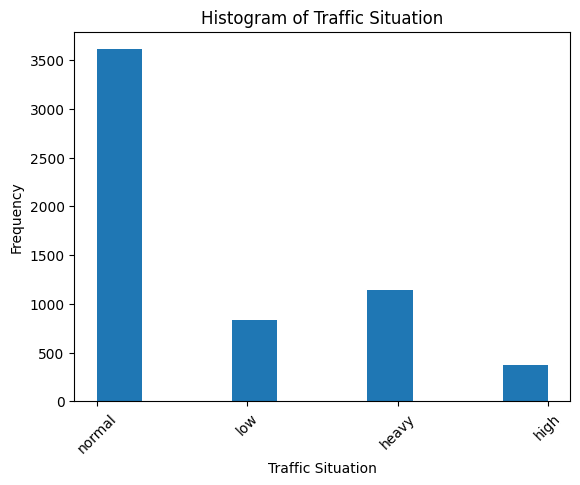

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Traffic Situation'])
plt.xlabel('Traffic Situation')
plt.ylabel('Frequency')
plt.title('Histogram of Traffic Situation')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Split the for train-test data
train = df.iloc[:-200]
test = df.iloc[-200:]
test.head()

,Date,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
5752,2024-02-07,10:00:00 PM,Tuesday,16,5,0,21,42,normal
5753,2024-02-07,10:15:00 PM,Tuesday,11,3,1,39,54,normal
5754,2024-02-07,10:30:00 PM,Tuesday,18,5,0,11,34,low
5755,2024-02-07,10:45:00 PM,Tuesday,12,0,1,32,45,normal
5756,2024-02-07,11:00:00 PM,Tuesday,15,4,1,39,59,normal


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train.Total, order=(2, 1, 0))
results = model.fit()

#predictions for the test set
forecast = results.forecast(steps=200)
forecast

,predicted_mean
5752,130.839768
5753,130.213723
5754,131.229902
5755,130.930615
5756,130.913065
...,...
5947,130.944270
5948,130.944270
5949,130.944270
5950,130.944270


In [ ]:
#error calculation
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#mean absolute error
test_Total = test['Total']
mae = mean_absolute_error(test_Total, forecast)

#root mean square error
mse = mean_squared_error(test_Total, forecast)
rmse = np.sqrt(mse)

#mean absolute percentage error
mape = (forecast - test_Total).abs().div(test_Total).mean()

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 53.73
RMSE: 61.60
MAPE: 0.88%


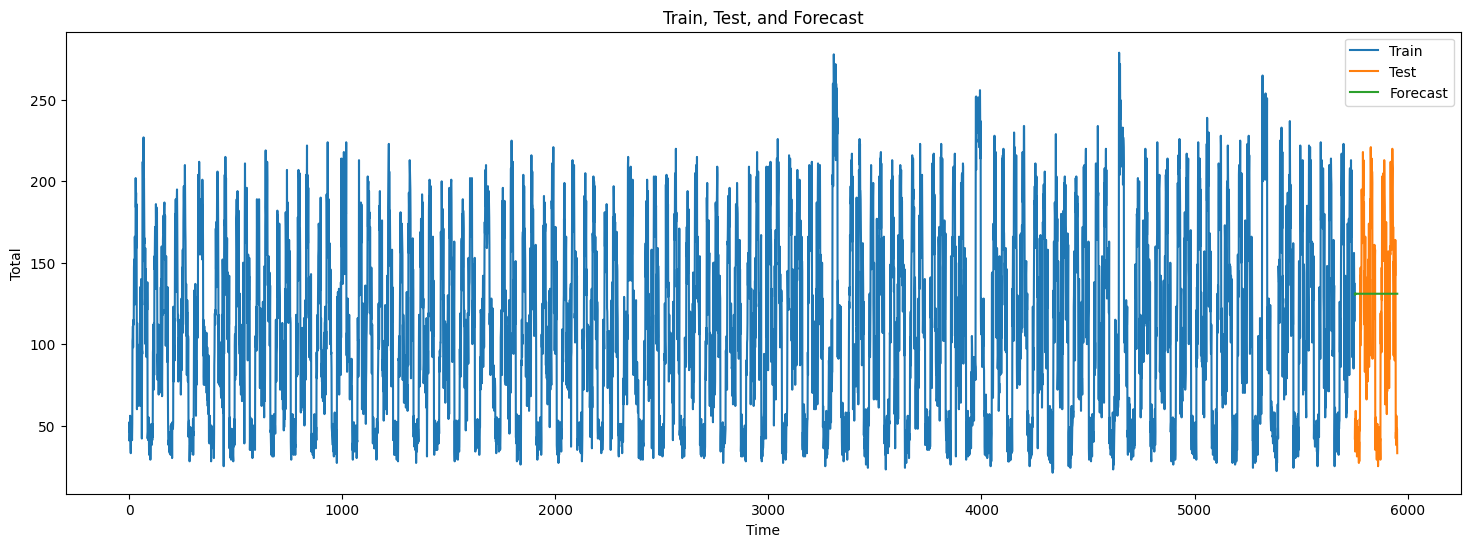

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plt.plot(train['Total'], label='Train')
plt.plot(test['Total'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Total')
plt.title('Train, Test, and Forecast')
plt.legend()
plt.show()

In [ ]:
accuracy = 100 - (mape * 100)
print(f"Accuracy: of Arima Model is {accuracy:.2f}%")

Accuracy: of Arima Model is 12.27%


In [ ]:
!pip install prophet

In [ ]:
# time column as ds and target as y are mandatory
df_p = df.reset_index()[["Time", "Total"]].rename(
   columns={"Time": "ds", "Total": "y"}
)
df_p.head()

,ds,y
0,12:00:00 AM,41
1,12:15:00 AM,52
2,12:30:00 AM,46
3,12:45:00 AM,50
4,1:00:00 AM,48


In [ ]:
import pandas as pd
from prophet import Prophet


model = Prophet()

model.fit(df_p)

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1133: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.history_dates = pd.to_datetime(pd.Series(history['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:287: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw47urjwz/ue3a2e11

In [ ]:
# create date to predict
future_dates = model.make_future_dataframe(periods=365)
# Make predictions
predictions = model.predict(future_dates)
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-09-28 00:00:00,38.036628,-7.310639,86.278948,38.036628,38.036628,0.0,0.0,0.0,0.0,0.0,0.0,38.036628
1,2024-09-28 00:15:00,38.750983,-7.460657,87.975382,38.750983,38.750983,0.0,0.0,0.0,0.0,0.0,0.0,38.750983
2,2024-09-28 00:30:00,39.465337,-5.388552,83.816754,39.465337,39.465337,0.0,0.0,0.0,0.0,0.0,0.0,39.465337
3,2024-09-28 00:45:00,40.179692,-4.910556,83.204074,40.179692,40.179692,0.0,0.0,0.0,0.0,0.0,0.0,40.179692
4,2024-09-28 01:00:00,40.894049,-4.553409,83.244817,40.894049,40.894049,0.0,0.0,0.0,0.0,0.0,0.0,40.894049


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


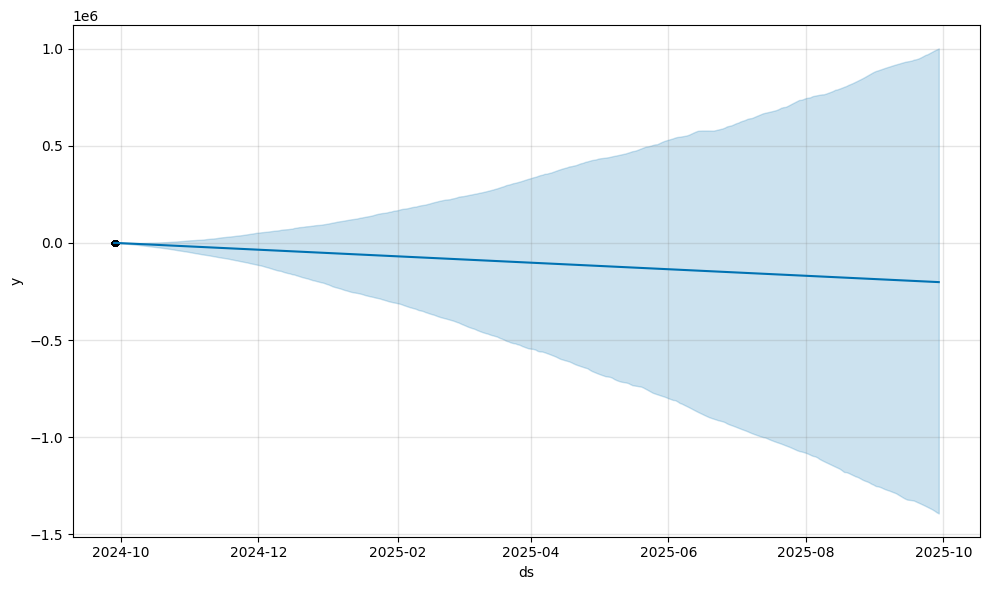

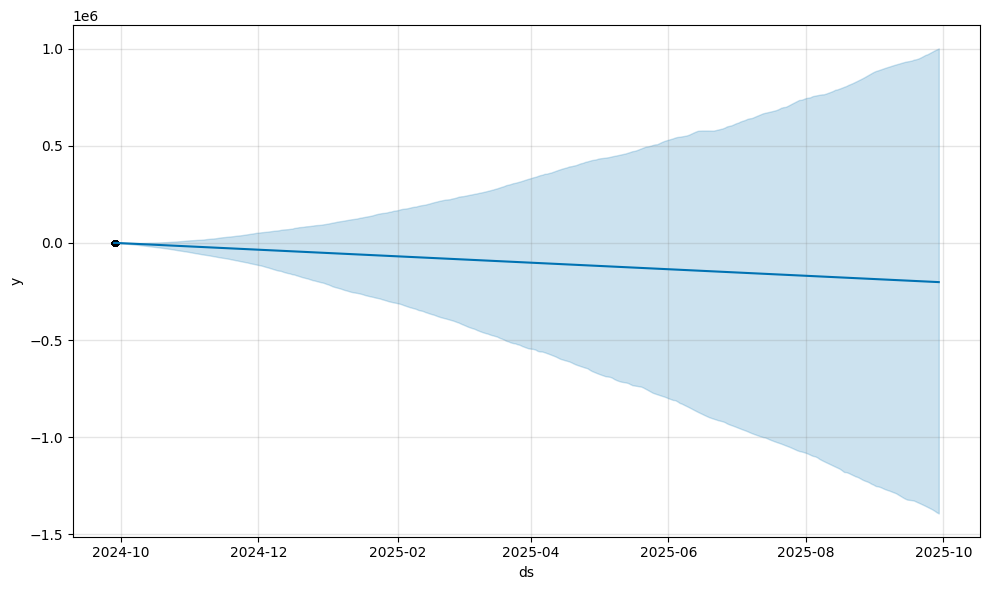

In [ ]:
model.plot(predictions)

In [ ]:
#used date instead of time
df_p = df.reset_index()[["Date", "Total"]].rename(
   columns={"Date": "ds", "Total": "y"}
)
df_p.head()

,ds,y
0,2023-12-10,41
1,2023-12-10,52
2,2023-12-10,46
3,2023-12-10,50
4,2023-12-10,48


In [ ]:
import pandas as pd
from prophet import Prophet
model = Prophet()
model.fit(df_p)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw47urjwz/i0x1p13c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw47urjwz/dhwczxrv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98746', 'data', 'file=/tmp/tmpw47urjwz/i0x1p13c.json', 'init=/tmp/tmpw47urjwz/dhwczxrv.json', 'output', 'file=/tmp/tmpw47urjwz/prophet_model35xxkn87/prophet_model-20240928211932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:19:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:19:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = model.make_future_dataframe(periods=2880)#2880 din = 1 mash
predictions = model.predict(future_dates)
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-12-10,101.640816,27.676764,168.059303,101.640816,101.640816,-0.427040,-0.427040,-0.427040,-0.427040,-0.427040,-0.427040,0.0,0.0,0.0,101.213776
1,2023-12-11,101.876592,37.188751,178.921095,101.876592,101.876592,0.686034,0.686034,0.686034,0.686034,0.686034,0.686034,0.0,0.0,0.0,102.562626
2,2023-12-12,102.112370,30.139476,169.396883,102.112370,102.112370,-0.833025,-0.833025,-0.833025,-0.833025,-0.833025,-0.833025,0.0,0.0,0.0,101.279345
3,2023-12-13,102.348147,26.827537,171.269282,102.348147,102.348147,0.655848,0.655848,0.655848,0.655848,0.655848,0.655848,0.0,0.0,0.0,103.003995
4,2023-12-14,102.583924,30.906220,172.029541,102.583924,102.583924,1.505534,1.505534,1.505534,1.505534,1.505534,1.505534,0.0,0.0,0.0,104.089459


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


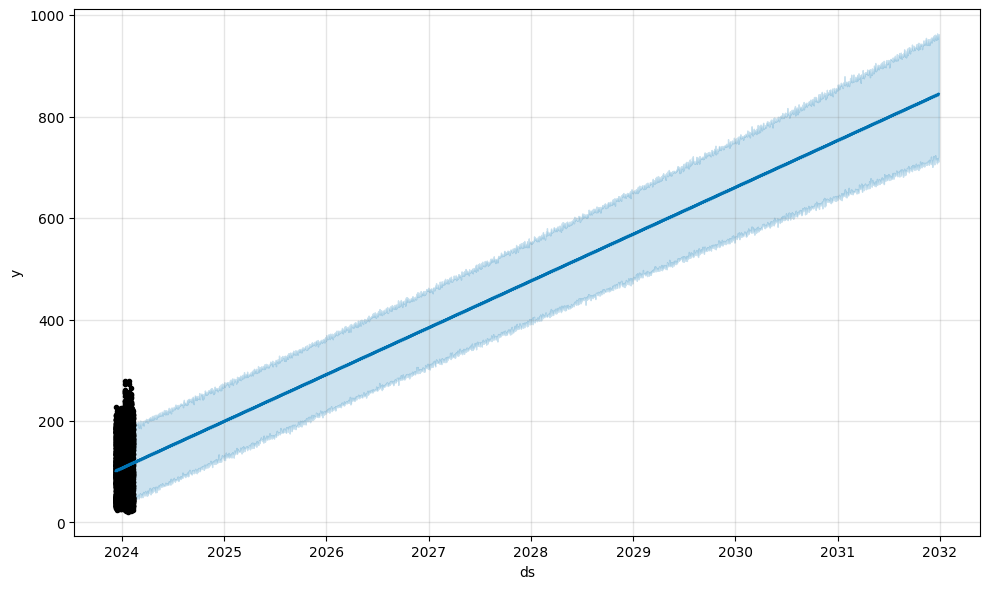

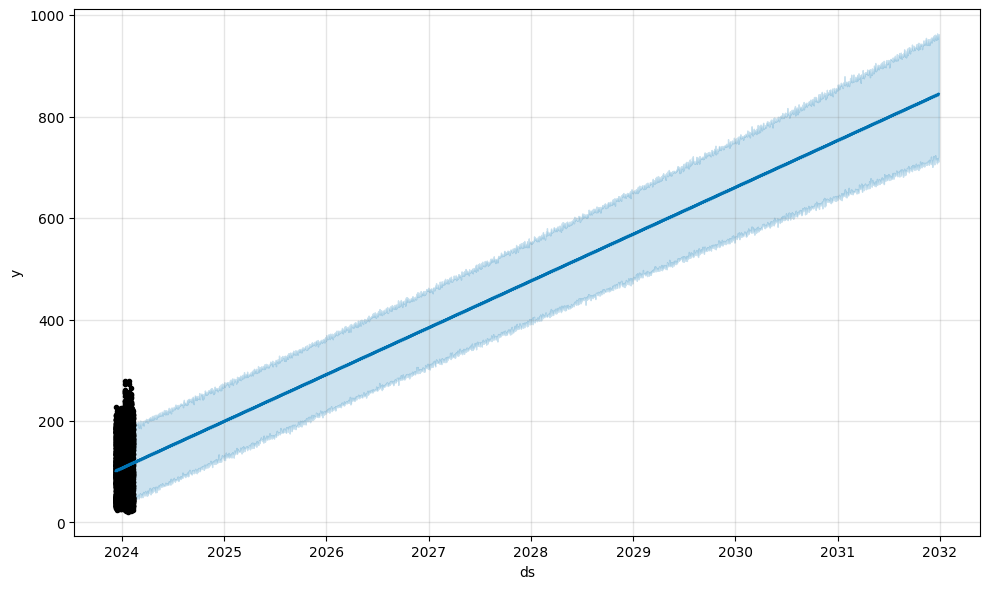

In [ ]:
model.plot(predictions)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


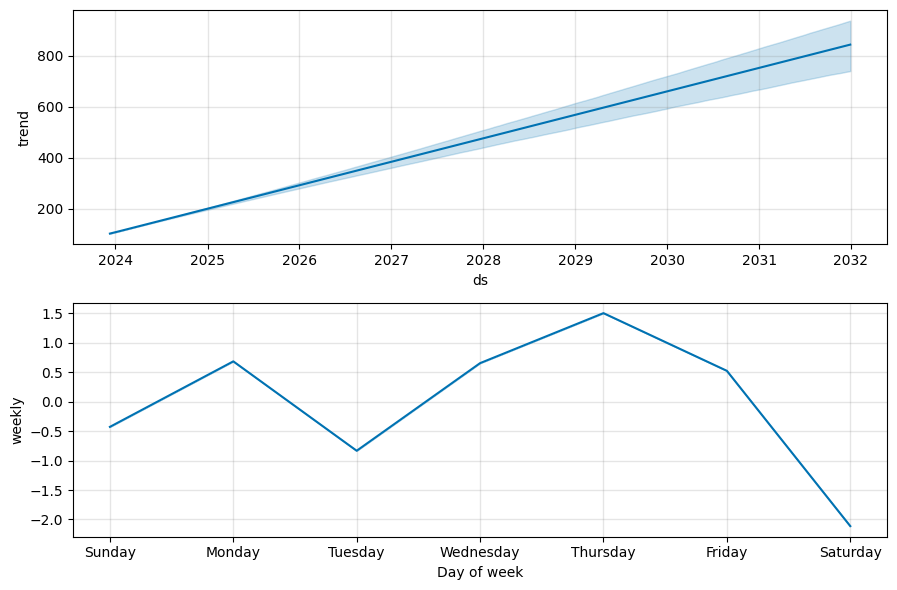

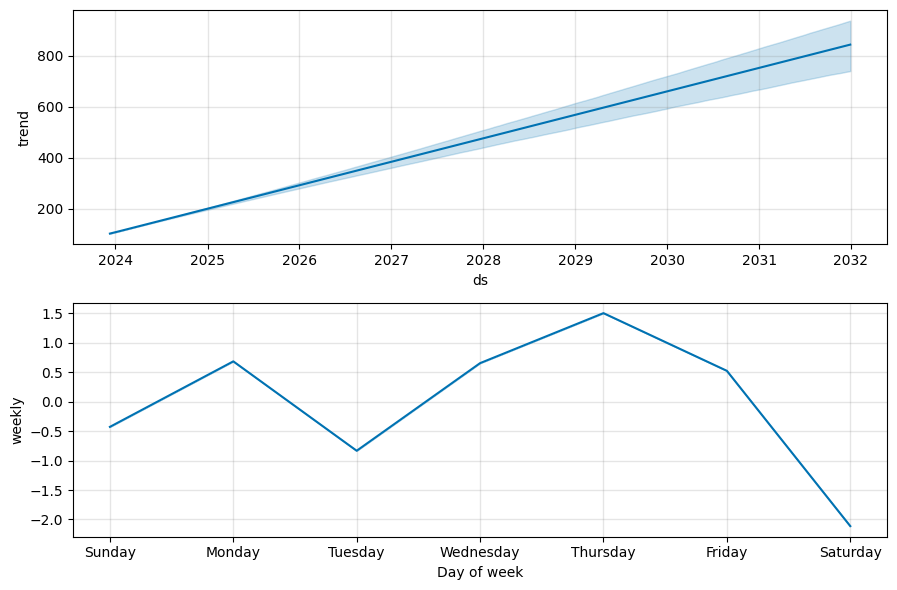

In [ ]:
model.plot_components(predictions)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

data = df['Total'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [ ]:
def create_sequences(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
look_back = 24
X, Y = create_sequences(data, look_back)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, Y_train, epochs=100, batch_size=32)

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print('RMSE:', rmse)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - loss: 0.0396
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0156
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0151
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0126
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0128
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0131
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0122
Epoch 8/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0126
Epoch 9/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0128
Epoch 10/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0132
Epoch 11/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0117
Epoch 12/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0129
Epoch 13/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0123
Epoch 14/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0122
Epoch 15/100
149/149 ━━━━━━━

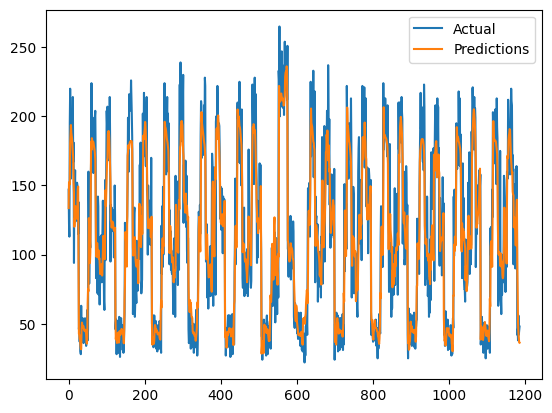

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Y_test, label='Actual')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(Y_test, predictions)
print('MAE:', mae)

rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print('RMSE:', rmse)

mape = np.mean(np.abs((Y_test - predictions) / Y_test)) * 100
print('MAPE:', mape)

MAE: 19.60046817400001
RMSE: 25.85629632598721
MAPE: 20.56029627626432


In [ ]:
accuracy_lstm = 100 - mape
print(f"Accuracy of LSTM Model: {accuracy_lstm:.2f}%")

Accuracy of LSTM Model: 79.44%


In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# we will use the "Traffic Situation" as target in this model
encoder = LabelEncoder()
df['Traffic Situation'] = encoder.fit_transform(df['Traffic Situation'])
data = df['Traffic Situation'].values

In [ ]:
look_back = 24
X, Y = [], []
for i in range(len(data)-look_back-1):
    a = data[i:(i+look_back)]
    X.append(a)
    Y.append(data[i + look_back])
X = np.array(X)
Y = np.array(Y)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

model = XGBClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Decode
predictions = encoder.inverse_transform(predictions)
Y_test = encoder.inverse_transform(Y_test)

In [ ]:
accuracy = accuracy_score(Y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.6677908937605397


In [ ]:
# 1 day/96row
last_values = data[-look_back:]
future_predictions = []
for i in range(96):
    prediction = model.predict(last_values.reshape(1, -1))
    future_predictions.append(prediction[0])
    last_values = np.append(last_values[1:], prediction)

future_predictions = encoder.inverse_transform(future_predictions)
print(future_predictions)

['normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal']


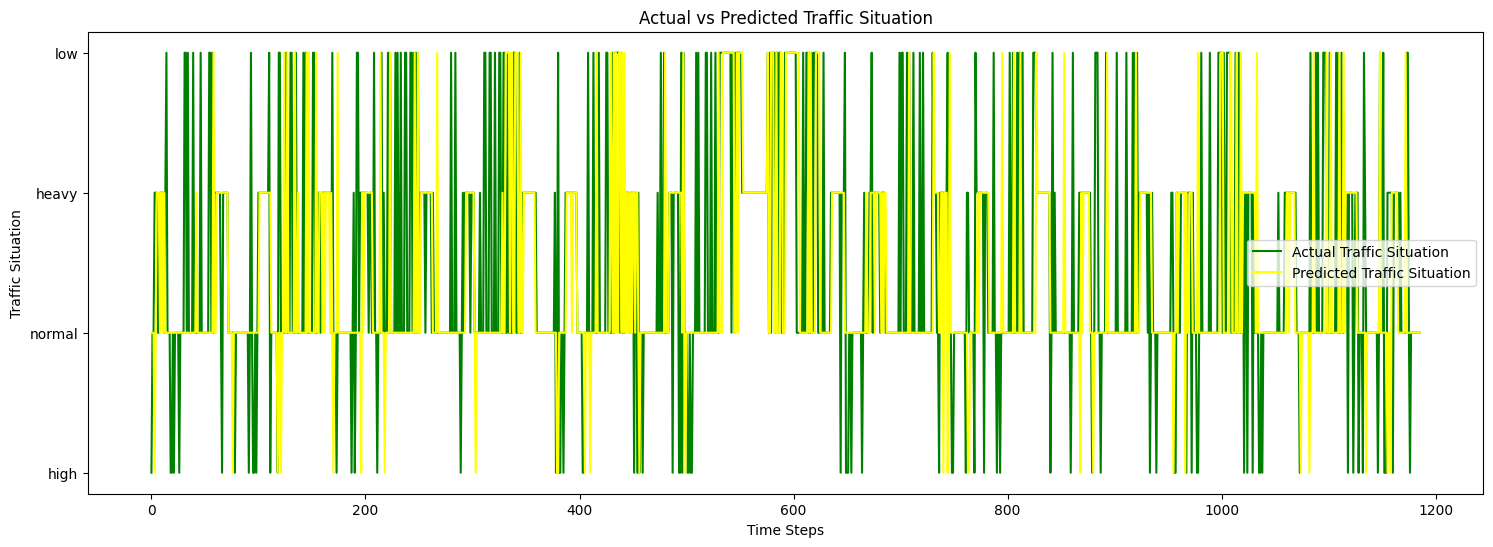

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Traffic Situation', color='green')
plt.plot(np.arange(len(predictions)), predictions, label='Predicted Traffic Situation', color='yellow')
plt.title('Actual vs Predicted Traffic Situation')
plt.xlabel('Time Steps')
plt.ylabel('Traffic Situation')
plt.legend()
plt.show()